In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [15]:
(x_train , y_train) , ( x_test , y_test ) = tf.keras.datasets.mnist.load_data() 

In [17]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [19]:
print("y_lables:" , np.unique(y_train))

y_lables: [0 1 2 3 4 5 6 7 8 9]


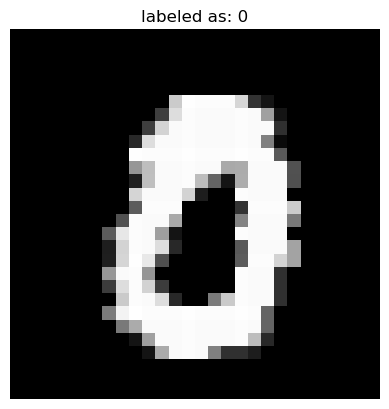

In [77]:
plt.imshow(x_train[69] , cmap = 'gray')
plt.title(f"labeled as: {y_train[69]}")
plt.axis("off")
plt.show()

In [37]:
x_train = x_train/255
x_test = x_test/255

In [41]:
x_train = x_train.reshape(-1 , 28 , 28 , 1)
x_test= x_test.reshape(-1 , 28 , 28 , 1)

In [43]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


In [47]:
model = keras.Sequential([
    keras.Input(shape = (28, 28 ,1 )),
    keras.layers.Conv2D(filters = 32 , kernel_size=(3 , 3) , activation = 'relu'), 
    keras.layers.Conv2D(filters = 64 , kernel_size = (3,3) , activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64 , activation ='relu'),
    keras.layers.Dense(10 , activation ='softmax')
                        
])

In [55]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)    

In [57]:
model.fit(x_train , y_train , epochs = 10 , validation_split = 0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.7629 - loss: 0.7298 - val_accuracy: 0.9240 - val_loss: 0.2700
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9106 - loss: 0.3015 - val_accuracy: 0.9423 - val_loss: 0.2105
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 75s 21ms/step - accuracy: 0.9232 - loss: 0.2560 - val_accuracy: 0.9465 - val_loss: 0.1920
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9321 - loss: 0.2266 - val_accuracy: 0.9503 - val_loss: 0.1818
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9386 - loss: 0.2057 - val_accuracy: 0.9550 - val_loss: 0.1616
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9416 - loss: 0.1929 - val_accuracy: 0.9513 - val_loss: 0.1663
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9464 - loss: 0.1814 - val_accuracy: 0.9582 - val_loss: 0.1511
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9469 -

In [67]:
test_loss , test_accuracy =model.evaluate(x_test , y_test)
print(f"test accuracy : {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9102 - loss: 33.3708
test accuracy : 0.9102


In [69]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [71]:
predicted_labels = np.argmax(predictions, axis=1)

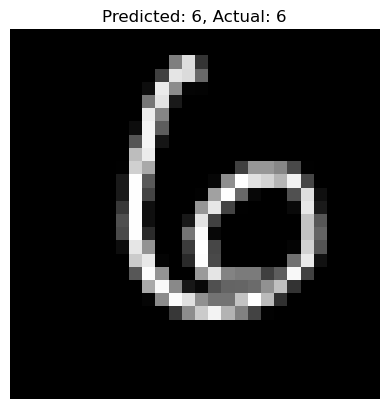

In [87]:
plt.imshow(x_test[100].reshape(28 , 28 ) , cmap ='grey')
plt.title(f"Predicted: {predicted_labels[100]}, Actual: {y_test[100]}")
plt.axis('off')
plt.show()

In [93]:
print("checking my own handwritten image")

checking my own handwritten image


In [139]:
from PIL import Image

In [141]:
img = Image.open("test_case1.jpg").convert("L") 

In [143]:
img = img.resize((28, 28))

img_array = np.array(img)

img_array = 255 - img_array

img_array = img_array / 255.0

img_array = img_array.reshape(1, 28, 28, 1)

In [145]:
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


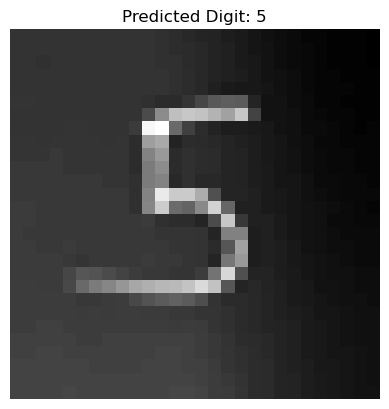

Model Prediction: 5


In [147]:
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()

print(f"Model Prediction: {predicted_digit}")

In [149]:
model.save("handwritten_digit_recognition_model.keras")